# Introduction on data

<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/colab_tutorials/blob/main/lecture3/intro_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

### Random blobs data

`sklearn`'s `make_blobs` function generates a random isotropic Gaussian blobs dataset

**Tutorial** 

- Play with the parameters of `make_blobs` and see how the plot changes



,feat0,feat1,target
0,-5.577854,5.872988,3
1,1.627832,4.178069,1
2,-6.950884,-9.024594,4
3,-0.952769,-5.034316,2
4,6.550104,-7.912339,0
...,...,...,...
95,3.719148,3.557522,1
96,-7.697481,-8.356274,4
97,-6.745814,5.757279,3
98,-5.096242,2.231017,3


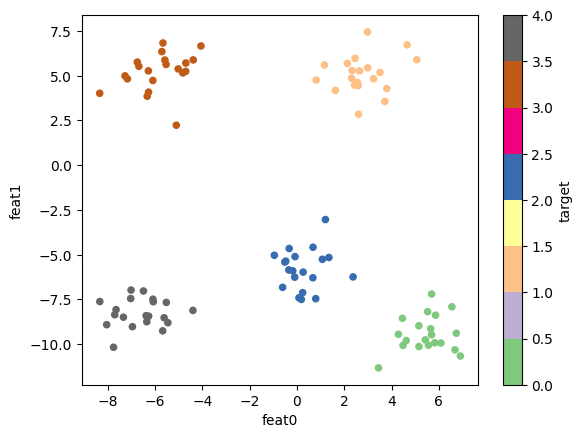

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd

data = make_blobs(
    n_samples=100, centers=5, cluster_std=1, n_features=2, random_state=10
)

# Convert the data to a pandas dataframe
# data[0] == X, data[1] == y
column_names = [f"feat{n}" for n in range(data[0].shape[1])]
df_blob = pd.DataFrame(data[0], columns=column_names)

# add y (or target)
df_blob["target"] = data[1]
df_blob.plot.scatter(x="feat0", y="feat1", c="target", cmap="Accent")
df_blob

### Generate data for a regression



,feat0,target
0,0.004291,12.326306
1,-0.255280,-7.844926
2,0.433026,8.484577
3,-0.112272,-4.211090
4,0.249179,-5.003591


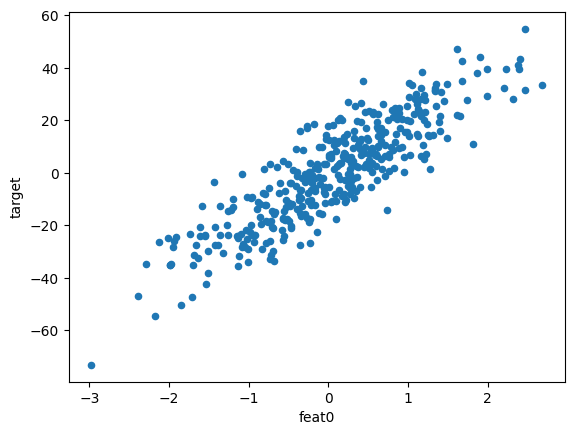

In [2]:
from sklearn.datasets import make_regression

data = make_regression(
    n_samples=400,
    random_state=10,
    noise=10,
    n_features=1,
)
# Convert data to dataframe
column_names = [f"feat{n}" for n in range(data[0].shape[1])]
df_reg = pd.DataFrame(data[0], columns=column_names)
df_reg["target"] = data[1]

# Scatter plot
df_reg.plot.scatter(y="target", x="feat0")
df_reg.head()

<Axes: ylabel='Frequency'>

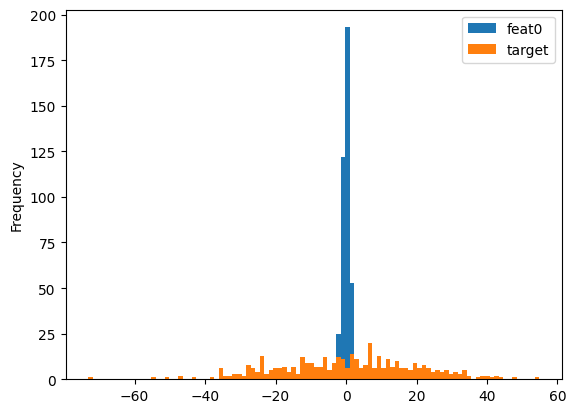

In [3]:
# Plot histogram with 200 bins
# Change number of bins
df_reg.plot.hist(bins=100)

### Split data

Read through: 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split 

For model evaluation,
- Split the dataset to 80% for training and 20% for testing the model. 
- Set the random seed to 10, making the split reproducible
- Plot `feat0` and `target` for the train and test dataset in the same plot. Use two colors to distinguish train and test


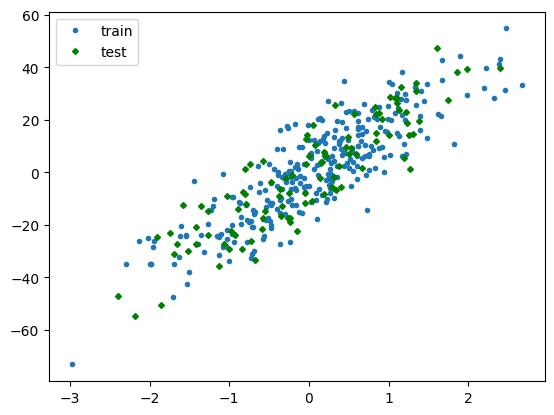

In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

# Use the arguments test_size and random_state in the function
df_train, df_test = train_test_split(df_reg, random_state=10)

ax.plot(df_train["feat0"], df_train["target"], "o", ms=3, label="train")
ax.plot(df_test["feat0"], df_test["target"], "D", ms=3, color="g", label="test")
ax.legend()

### Use the Wikipedia API

Retrieve full text of a website using the Wikipedi API


In [5]:
#!pip install wikipedia-api
import wikipediaapi

wiki_wiki = wikipediaapi.Wikipedia("MyProjectName (bla@bla.com)", "en")

page_py = wiki_wiki.page("Python_(programming_language)")
print(page_py.text)

Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.Guido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language and first released it in 1991 as Python 0.9.0. Python 2.0 was released in 2000. Python 3.0, released in 2008, was a major revision not completely backward-compatible with earlier versions. Python 2.7.18, released in 2020, was the last release of Python 2.Python consistently ranks as one of the most popular programming languages.

History
Python was conceived in the late 1980s by Guido van Rossum at Centrum Wiskunde & Informatica (CWI) in the Netherland

### Create a Wordcloud of the Wikipedia data

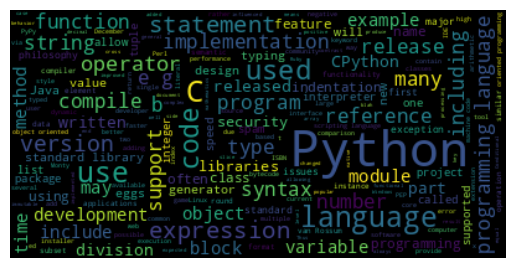

In [10]:
#!pip install wordcloud

from wordcloud import WordCloud

# Display the generated image:
import matplotlib.pyplot as plt

# Generate a word cloud image
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(page_py.text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()